### Q1. (To Explore Supervised Machine Learning)

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?

Sample Solution :

https://drive.google.com/file/d/1koGHPElsHuXo9HPL4BQkZWRMJkOEHiv4/view?usp=sharing

#### Importing the required libraries and the dataset

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

data = pd.read_csv("http://bit.ly/w-data")

#### Reviewing the imported data

In [2]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Plotting the datapoints to establish a relationship between the variables

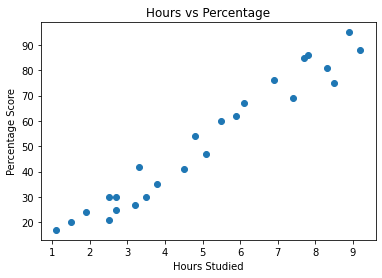

In [3]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Dividing the dataset into dependent and independent variables (y = dependent X = independent)

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

#### Splitting the data to create training and testing data (test size = 20% of original data)

In [5]:
from sklearn.model_selection import train_test_split

# random state for keeping the values constant for every iteration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Importing the LinearRegression class from scikit-learn's linear_model module and creating a regressor to fit on the data

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Plotting the line of regression alongwith the datapoints

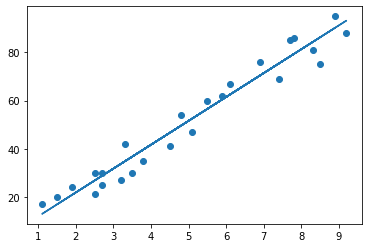

In [7]:
# equation of a linear regression model;
# y = mx+c
line = (regressor.coef_)*(X)+(regressor.intercept_)

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Predicting the values of testing data

In [8]:
y_pred = regressor.predict(X_test)

y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing the predicted values with the actual values of the testing data

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### What will be predicted score if a student study for 9.25 hrs in a day?

In [10]:
hours = 9.25
pred = regressor.predict([[hours]])

print("Predicted Score for {0} hours = {1}".format(hours, pred[0]))

Predicted Score for 9.25 hours = 93.69173248737539


### Q2. (To Explore Unsupervised Machine Learning)

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

Sample Solution : https://drive.google.com/file/d/1Yjz8dzSbpAPwJdcVb20eFWniIDbs6ZH7/view?usp=sharing

#### Importing the required libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#### Loading the dataset

In [12]:
data_iris = datasets.load_iris()
iris = pd.DataFrame(data_iris.data, columns = data_iris.feature_names)

#### Reviewing the data

In [13]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Creating a dataframe for independent variables (X)

In [14]:
x = iris.iloc[:, [0, 1, 2, 3]].values

#### Importing KMeans class from sklearn's cluster module

In [15]:
from sklearn.cluster import KMeans

#### Declaring an ampty list for Within Cluster Sum Of Squares (WCSS)

In [16]:
wcss = []

#### Running KMeans algorithm for variable n_clusters (1-10) to determine the optimum number of clusters on the basis of KMeans Inertia

In [17]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Printing Within Cluster Sum of Squares (WCSS) list

In [18]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.299712121212124,
 30.063110617452725,
 28.27172172856384,
 26.094324740540415]

#### Plotting the Number of Clusters vs. Within Cluster Sum of Squares (WCSS) to determine the optimum number of clusters using "The Elbow Method"

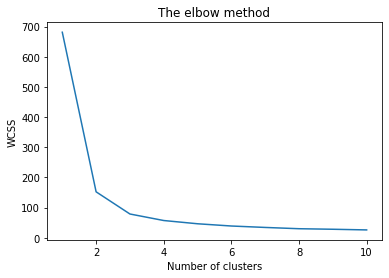

In [19]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Taking number of optimum clusters as 3 based on "The Elbow Method's" graph above and applying the KMeans classifier on the dataset finally

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

#### Plotting the clusters and their centroids

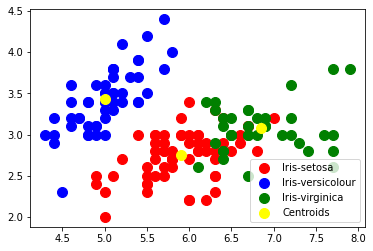

In [21]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Q3. (To Explore Decision Tree Algorithm )
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

Sample Solution :  https://drive.google.com/file/d/1mQguC2gku2-QFruj09a30N0TYDwCmPkq/view?usp=sharing

#### Importing the required packages and dataset

In [22]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

iris = datasets.load_iris()

#### Creating a dataframe of the Iris dataset

In [23]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


#### Creating a list of target variables

In [24]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Creating a Decision Tree Classifier

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(df_iris, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Visualizing the Decision Tree

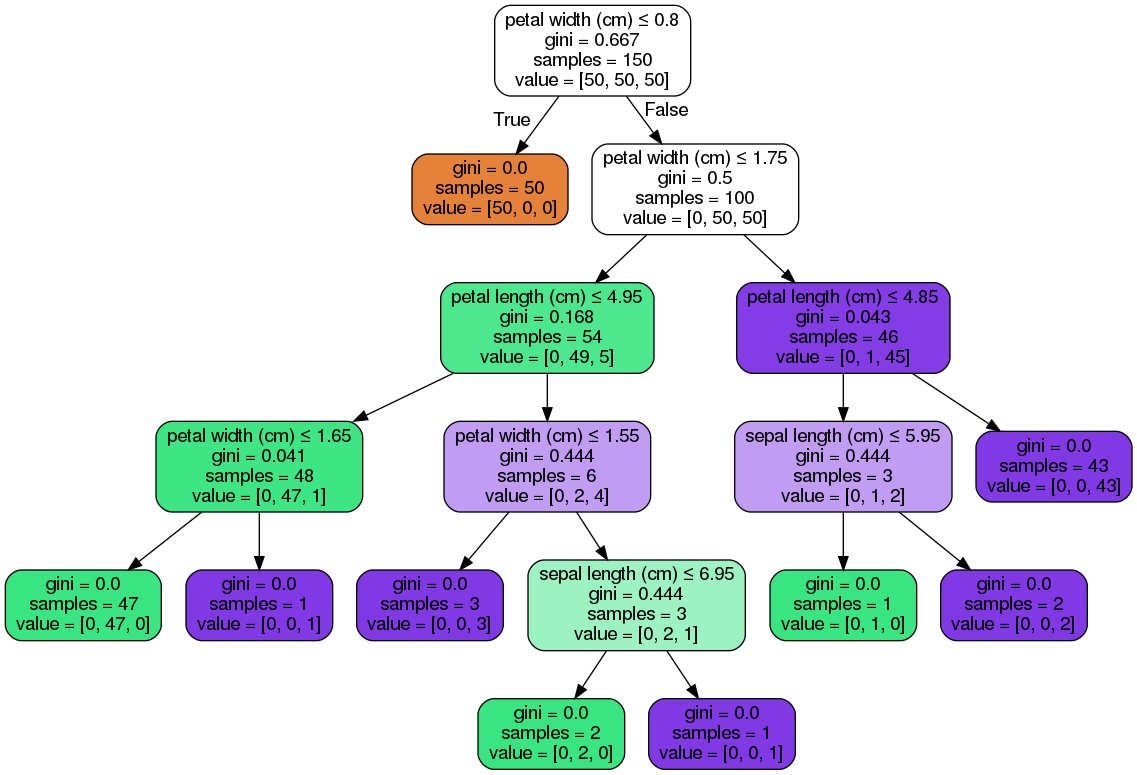

In [26]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())